# EDA Shopping Behavior

In [ ]:
!pip install matplotlib -q
!pip install seaborn -q
!pip install folium -q
!pip install geopy -q

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import numpy as np
import folium
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster

font_path = 'c:\\Windows\\Fonts\\GULIM.TTC' # 윈도우 OS 폰트 경로
font_prop = fm.FontProperties (fname=font_path)
font_name = font_prop.get_name() # 폰트명
matplotlib.rc('font', family=font_name)

# matplotlib이 기본적으로 사용하는 유니코드 마이너스 비활성화
# -> 아스키코드의 마이너스 사용

plt.rc('axes', unicode_minus=False)

### 01. 데이터 수집 및 로드

In [ ]:
shopping_df = pd.read_csv('../data/shopping_behavior_updated.csv')
shopping_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### 02. 데이터구조 및 변수 이해

In [ ]:
print(shopping_df.shape)
print(shopping_df.dtypes)
shopping_df.info()

(3900, 18)
Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null  

### 03. 데이터 요약 및 기술통계

In [ ]:
# 수치형 컬럼만 선택
numeric_df = shopping_df.select_dtypes(include=['number'])

# 범주형 컬럼만 선택
categorical_df = shopping_df.select_dtypes(include=['object', 'category'])

# 확인
display(numeric_df.describe())
display(categorical_df.describe())

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


### 04. 결측치, 이상치

In [ ]:
shopping_df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [ ]:
shopping_df.duplicated('Customer ID').sum()

np.int64(0)

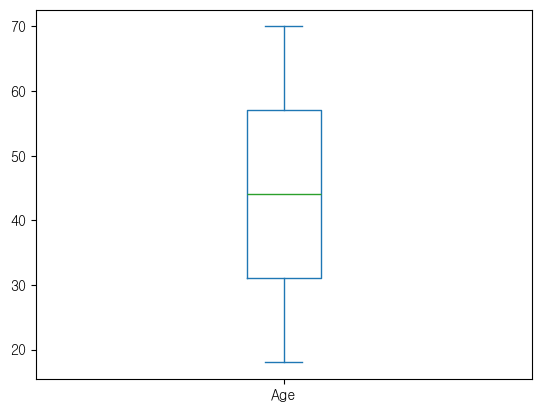

In [ ]:
shopping_df['Age'].plot(kind='box')
plt.show()

### 05. 변수분포 시각화

- 모든 고객의 가테고리별 구매율
- 서부지역에 카테고리별 구매율
- 상품 품목별 판매 개수

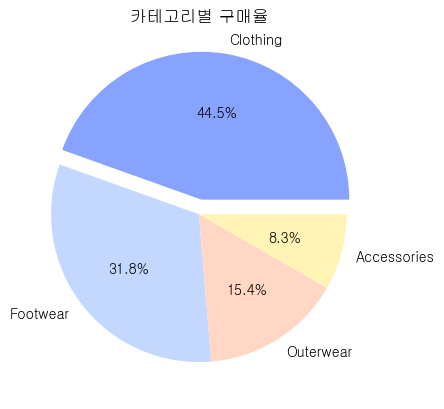

In [ ]:
category_count = shopping_df['Category'].value_counts()

plt.pie(category_count, labels=shopping_df['Category'].unique(), 
        autopct='%1.1f%%', explode=[0.1, 0, 0, 0],
        colors=['#87A2FF', '#C4D7FF', '#FFD7C4', '#FFF4B5'])

plt.title('카테고리별 구매율')
plt.show()

In [ ]:
# 지역으로 분류
def location_separate(location):
    
    EAST_STATES = ('Alabama', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Maine', 'Maryland', 'Massachusetts', 'Mississippi', 'New Hampshire', 'New Jersey', 'New York', 'North Carolina', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Vermont', 'Virginia', 'West Virginia')
    CENTRAL_STATES = ('Arkansas', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Louisiana', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'Oklahoma', 'South Dakota', 'Texas', 'Wisconsin')
        
    if location in EAST_STATES :
            return '동부'
    elif location in CENTRAL_STATES :
            return '중부'
    else:
            return '서부'    

location_category = shopping_df['Location'].apply(location_separate)
shopping_df['Region'] = location_category

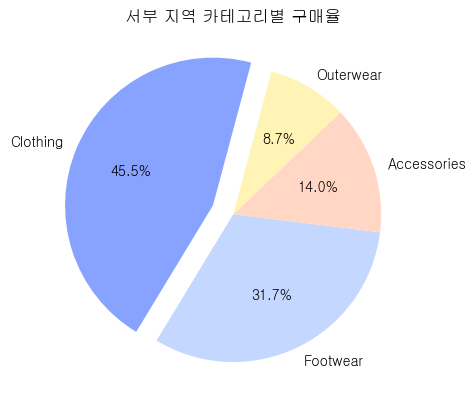

In [ ]:
# 서부 지역만 필터링
west = shopping_df[shopping_df['Region'] == '서부']

category_count = west['Category'].value_counts()

plt.pie(category_count, labels=west['Category'].unique(), 
        autopct='%1.1f%%', explode=[0.15, 0, 0, 0], startangle=75,
        colors=['#87A2FF', '#C4D7FF', '#FFD7C4', '#FFF4B5'])

plt.title('서부 지역 카테고리별 구매율')
plt.show()

In [ ]:
# 상품품목 판매 개수
fig, ax = plt.subplots(1, 1, figsize=(12,8))
sns.countplot(shopping_df, x='Item Purchased', hue='Item Purchased')
plt.xticks(rotation=45)
plt.title('상품품목 판매 개수')
plt.show()

In [ ]:
# 서부 지역 카테고리별 남/여 구매수
category_colors = ['#87A2FF', '#C4D7FF', '#FFD7C4', '#FFF4B5']

sns.countplot(data=west, x='Gender', hue='Category', palette=category_colors)
plt.title('서부 지역 카테고리별 남/여 구매수')
plt.show()

### 06. 변수간 관계 시각화

- 서부 지역 카테고리별 연령대 구매율
- 계졀별 많이 구매한 상품품목

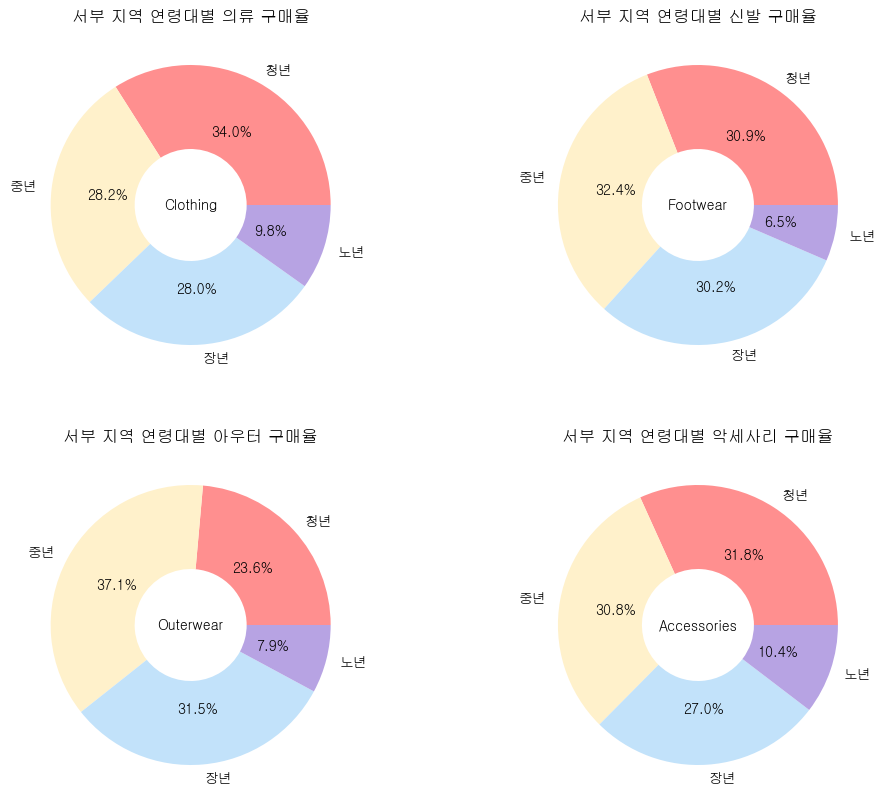

In [ ]:
shopping_df['AgeGroup'] = pd.cut(shopping_df['Age'], 
                                 bins=[19, 35, 50, 64, shopping_df['Age'].max()],
                                 labels=['청년', '중년', '장년', '노년'],
                                 right=False)

# 서부 지역만 필터링
west = shopping_df[shopping_df['Region'] == '서부']

# 카테고리별
clothing_df = west[west['Category'] == 'Clothing']
footwear_df = west[west['Category'] == 'Footwear']
outwear_df = west[west['Category'] == 'Outerwear']
accessories_df = west[west['Category'] == 'Accessories']

# 연령대별 
clothing_df_age = clothing_df['AgeGroup'].value_counts().sort_index()
footwear_df_age = footwear_df['AgeGroup'].value_counts().sort_index()
outwear_df_age = outwear_df['AgeGroup'].value_counts().sort_index()
accessories_df_age = accessories_df['AgeGroup'].value_counts().sort_index()


fig, ax = plt.subplots(2, 2, figsize=(12,10))

ax[0,0].pie(clothing_df_age, labels=clothing_df_age.index, autopct='%1.1f%%', 
            wedgeprops={'width' : 0.6},
            colors=['#FF8F8F', '#FFF1CB', '#C2E2FA', '#B7A3E3'])
ax[0,0].set_title('서부 지역 연령대별 의류 구매율')
ax[0,0].text(0, 0, 'Clothing', ha='center', va='center')

ax[0,1].pie(footwear_df_age, labels=footwear_df_age.index, autopct='%1.1f%%',
            wedgeprops={'width' : 0.6},
            colors=['#FF8F8F', '#FFF1CB', '#C2E2FA', '#B7A3E3'])
ax[0,1].set_title('서부 지역 연령대별 신발 구매율')
ax[0,1].text(0, 0, 'Footwear', ha='center', va='center')

ax[1,0].pie(outwear_df_age, labels=outwear_df_age.index, autopct='%1.1f%%',
            wedgeprops={'width' : 0.6},
            colors=['#FF8F8F', '#FFF1CB', '#C2E2FA', '#B7A3E3'])
ax[1,0].set_title('서부 지역 연령대별 아우터 구매율')
ax[1,0].text(0, 0, 'Outerwear', ha='center', va='center')


ax[1,1].pie(accessories_df_age, labels=accessories_df_age.index, autopct='%1.1f%%',
            wedgeprops={'width' : 0.6},
            colors=['#FF8F8F', '#FFF1CB', '#C2E2FA', '#B7A3E3'])
ax[1,1].set_title('서부 지역 연령대별 악세사리 구매율')
ax[1,1].text(0, 0, 'Accessories', ha='center', va='center')

plt.show()

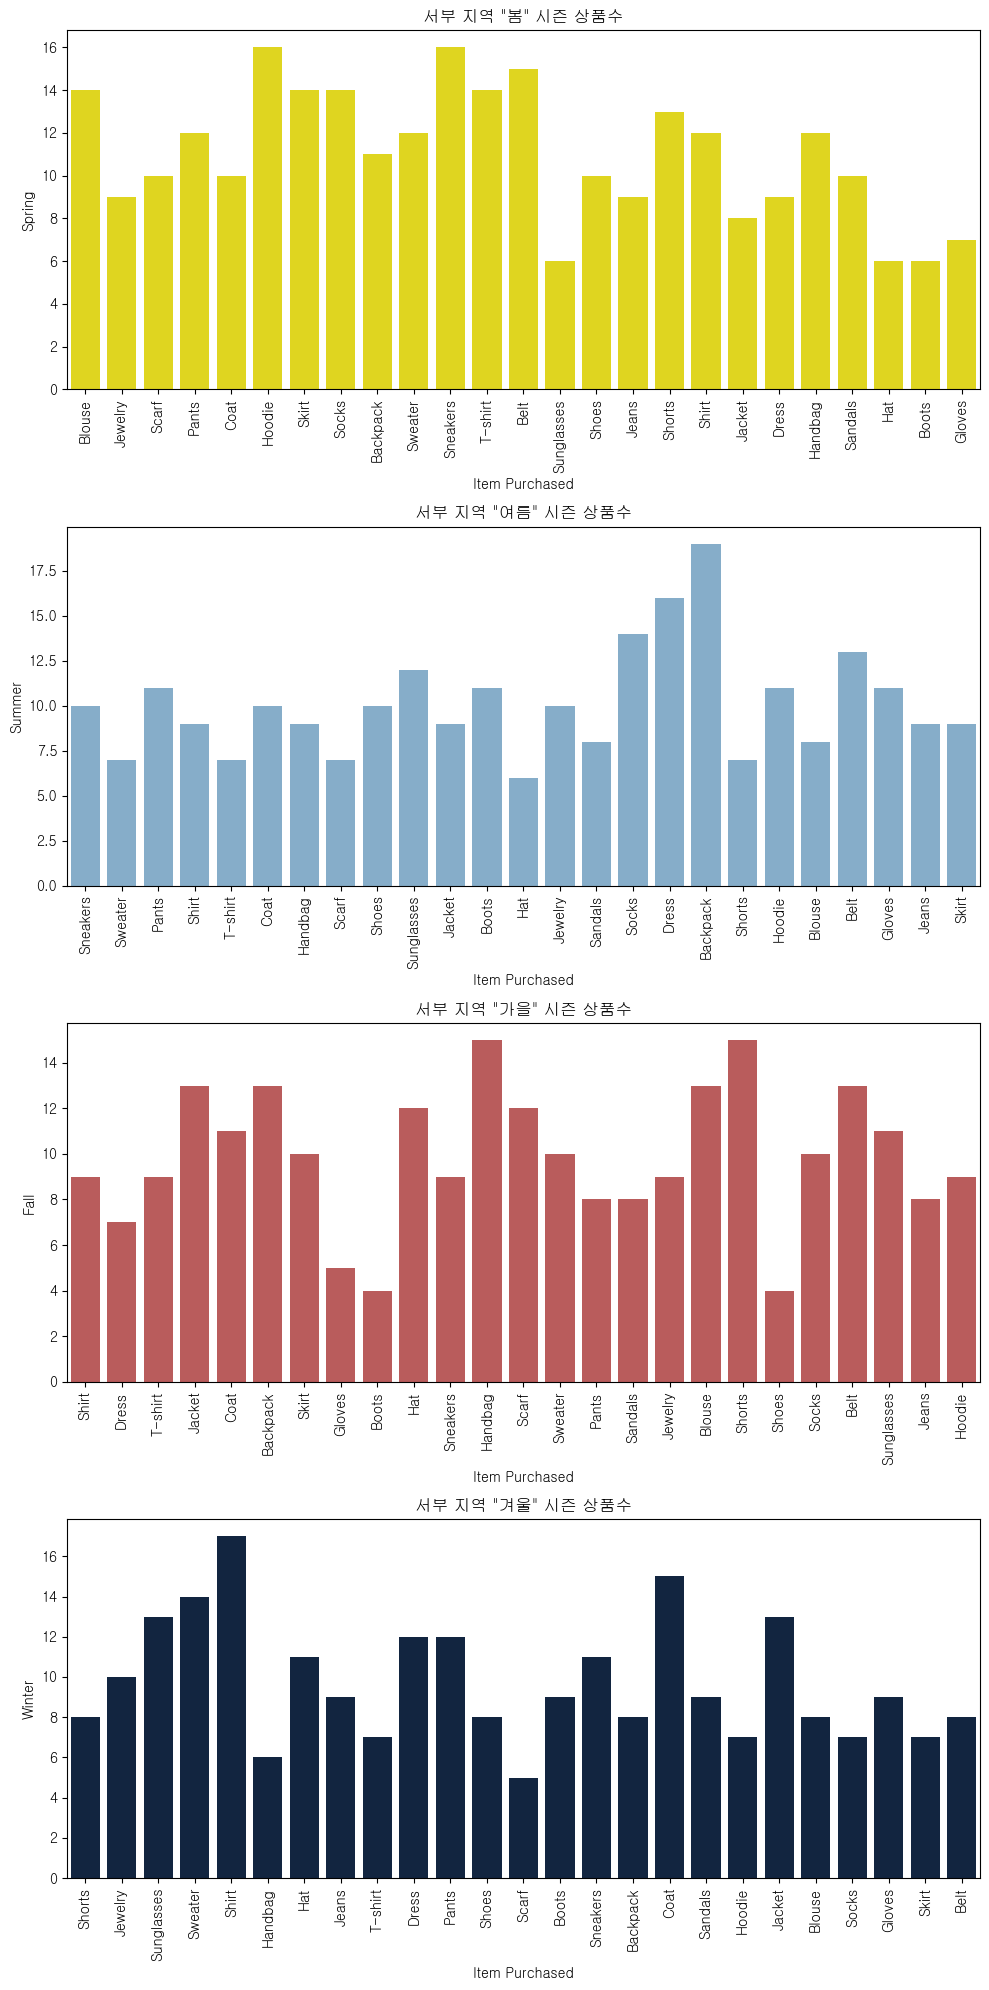

In [ ]:
east_spring = west[west['Season'] == 'Spring']
east_summer = west[west['Season'] == 'Summer']
east_fall = west[west['Season'] == 'Fall']
east_winter = west[west['Season'] == 'Winter']

fig, ax = plt.subplots(4, 1, figsize=(10,20))

# 봄
sns.countplot(data=east_spring, x='Item Purchased', color='#FFF200', ax=ax[0])
ax[0].set_ylabel('Spring')
ax[0].set_title('서부 지역 "봄" 시즌 상품수')
ax[0].tick_params(axis='x', rotation=90)

# 여름
sns.countplot(data=east_summer, x='Item Purchased', color='#7BAFD4', ax=ax[1])
ax[1].set_ylabel('Summer')
ax[1].set_title('서부 지역 "여름" 시즌 상품수')
ax[1].tick_params(axis='x', rotation=90)

# 가을
sns.countplot(data=east_fall, x='Item Purchased', color= '#C94C4C', ax=ax[2])
ax[2].set_ylabel('Fall')
ax[2].set_title('서부 지역 "가을" 시즌 상품수')
ax[2].tick_params(axis='x', rotation=90)

# 겨울
sns.countplot(data=east_winter, x='Item Purchased', ax=ax[3], color='#0B2447')
ax[3].set_ylabel('Winter')
ax[3].set_title('서부 지역 "겨울" 시즌 상품수')
ax[3].tick_params(axis='x', rotation=90)

# ax 간격 자동조절
plt.tight_layout()
plt.show()

In [ ]:
# 성별별 품목에 따른 이전 구매수
fig, ax = plt.subplots(1, 1, figsize=(12,8))

sns.barplot(data=shopping_df, x='Item Purchased', y='Previous Purchases', hue='Gender', errorbar=None)
plt.xticks(rotation=45)
plt.title('성별 품목에 따른 이전 구매수')
plt.show()

### 07. 상관관계 및 교차분석
- 연속형 데이터 : 상관계수
- 범주형 데이터 : 교차표

### 08. 데이터 전처리
- 결측치/중복값/이상치 처리
- 불필요한 컬럼 제거

### 09. Feature Engineering
Feature(독립변수, 속성, 열) 가공

- 새로운 변수 생성
- 그룹핑 처리
- 편향개선
- 스케일링 (범위변경)

### 문자형 -> 수치형
1. 범주형 -> 수치값
2. one-hot encoding 해당하는 값만 1이 되도록 변경

### 10. 최종요약/인사이트 도출

- 서부지역 사람들은 의류를 많이 구매한다.
- 봄에는 후드, 여름에는 백팩, 가을에는 핸드백, 겨울에는 셔츠가 가장 많이 판매되었다.